# The impact of different percentage data size on the time efficiency of collaborative and content-based movie recommendation system. 

In [259]:
# importing pandas, numpy modules
import pandas as pd 
import numpy as np 
import random
import time
from matplotlib import pyplot as plt

df1 = pd.read_csv("C:\\Users\\Muhammmad\\Documents\\dissertation\\tmdb-movie-metadata\\tmdb_5000_credits.csv")
print("columns " + "rows")
print(df1.shape)


df2 = pd.read_csv("C:\\Users\\Muhammmad\\Documents\\dissertation\\tmdb-movie-metadata\\tmdb_5000_movies.csv")
print("columns " + "rows")
print(df2.shape)

df3 = pd.read_csv("C:\\Users\\Muhammmad\\Documents\\dissertation\\the-moves-dataset\\ratings_small.csv", encoding="utf8")
print("columns " + "rows")
print(df3.shape)

columns rows
(4803, 4)
columns rows
(4803, 20)
columns rows
(100004, 4)


# **Content Based Filtering**

In [119]:
df1 = pd.read_csv("C:\\Users\\Muhammmad\\Documents\\dissertation\\tmdb-movie-metadata\\tmdb_5000_credits.csv", encoding="utf8")
df2 = pd.read_csv("C:\\Users\\Muhammmad\\Documents\\dissertation\\tmdb-movie-metadata\\tmdb_5000_movies.csv", encoding="utf8")

In [120]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

In [43]:
Df3 = df2.iloc[:480] #10%

In [58]:
Df3 = df2.iloc[:960] #20%

In [66]:
Df3 = df2.iloc[:1441] #30%

In [72]:
Df3 = df2.iloc[:1921] #40%

In [82]:
Df3 = df2.iloc[:2401] #50%

In [88]:
Df3 = df2.iloc[:2881] #60%

In [97]:
Df3 = df2.iloc[:3362] #70%

In [105]:
Df3 = df2.iloc[:3842] #80%

In [111]:
Df3 = df2.iloc[:4323] #90%

In [121]:
Df3 = df2.iloc[:4803] #100%

In [122]:
Df3['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [127]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
#pd.options.mode.chained_assignment = None  # default='warn'

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
Df3['overview'] = Df3['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(Df3['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

In [128]:
import time

# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

#Construct a reverse map of indices and movie titles
indices = pd.Series(Df3.index, index=Df3['title']).drop_duplicates()

start = time.time()

# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return Df3['title'].iloc[movie_indices]

get_recommendations('The Dark Knight Rises')

print(f'Time: {time.time() - start}')

Time: 0.0234525203704834


In [90]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

# **Collobrative Filtering**

In [286]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
reader = Reader()
ratings = pd.read_csv('C:\\Users\\Muhammmad\\Documents\\dissertation\\the-moves-dataset\\ratings_small.csv')
#ratings.head()
Df4 = ratings.iloc[:100000] #100%

In [287]:
start = time.time()

data = Dataset.load_from_df(Df4[['userId', 'movieId', 'rating']], reader)
algo = SVD()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

trainset = data.build_full_trainset()
algo.fit(trainset)

ratings[ratings['userId'] == 1]

algo.predict(1, 302, 3)

print(f'Time: {time.time() - start}')

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8968  0.8969  0.8972  0.9012  0.8953  0.8975  0.0020  
MAE (testset)     0.6908  0.6906  0.6908  0.6957  0.6885  0.6913  0.0024  
Fit time          4.03    4.04    4.16    4.03    4.66    4.18    0.24    
Test time         0.26    0.11    0.11    0.26    0.15    0.18    0.07    
Time: 29.281857013702393


In [185]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
algo = SVD()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8925  0.9049  0.8887  0.8953  0.8957  0.8954  0.0053  
MAE (testset)     0.6875  0.6972  0.6857  0.6911  0.6870  0.6897  0.0042  
Fit time          5.10    5.64    5.15    5.31    5.65    5.37    0.23    
Test time         0.23    0.15    0.23    0.16    0.14    0.18    0.04    


{'test_rmse': array([0.89251764, 0.9048738 , 0.88874712, 0.89534568, 0.89570058]),
 'test_mae': array([0.68747511, 0.69719479, 0.68574715, 0.69111765, 0.68697665]),
 'fit_time': (5.095412492752075,
  5.636609315872192,
  5.1544413566589355,
  5.314290761947632,
  5.651961088180542),
 'test_time': (0.23185014724731445,
  0.15188050270080566,
  0.22507190704345703,
  0.15989351272583008,
  0.1425318717956543)}

In [187]:
trainset = data.build_full_trainset()
algo.fit(trainset)

In [188]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [250]:
algo.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.6824505974694874, details={'was_impossible': False})

In [257]:
#Testing time on the perecentage data size for Content Based System (filtering)
Percentage = ['10%','20%','30%','40%', '50%', '60%', '70%', '80%', '90%', '100%']
Time = [0.0009,0.0019,0.0029,0.0050,0.0059,0.0099,0.0129,0.0149,0.0189,0.0234]
s1 = pd.Series(Percentage, name='Percentage')
s2 = pd.Series(Time, name='Time')
df = pd.concat([s1,s2], axis=1)
df

,Percentage,Time
0,10%,0.0009
1,20%,0.0019
2,30%,0.0029
3,40%,0.0050
4,50%,0.0059
5,60%,0.0099
6,70%,0.0129
7,80%,0.0149
8,90%,0.0189
9,100,0.0234


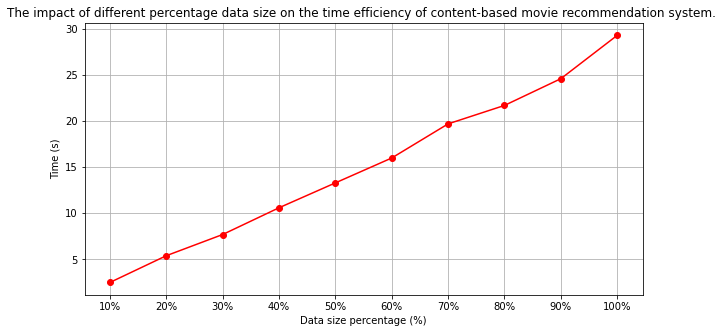

In [293]:
plt.figure(figsize=(10,5))
plt.plot(Percentage, Time, 'ro-')
plt.xlabel('Data size percentage (%)')
plt.ylabel('Time (s)')
plt.title('The impact of different percentage data size on the time efficiency of content-based movie recommendation system. ')
plt.grid()
plt.show()

In [291]:
#Testing time on the perecentage data size for Collobrative System (filtering)
Percentage = ['10%','20%','30%','40%', '50%', '60%', '70%', '80%', '90%', '100%']
Time = [2.5, 5.4, 7.7, 10.6, 13.3, 16.0, 19.7, 21.7, 24.6, 29.3]
s1 = pd.Series(Percentage, name='Percentage')
s2 = pd.Series(Time, name='Time')
df = pd.concat([s1,s2], axis=1)
df

,Percentage,Time
0,10%,2.5
1,20%,5.4
2,30%,7.7
3,40%,10.6
4,50%,13.3
5,60%,16.0
6,70%,19.7
7,80%,21.7
8,90%,24.6
9,100%,29.3


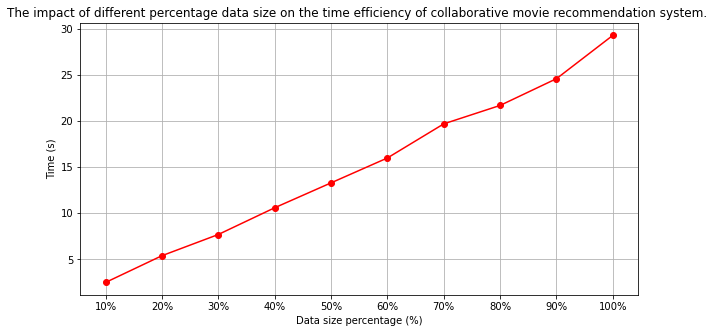

In [294]:
plt.figure(figsize=(10,5))
plt.plot(Percentage, Time, 'ro-')
plt.xlabel('Data size percentage (%)')
plt.ylabel('Time (s)')
plt.title('The impact of different percentage data size on the time efficiency of collaborative movie recommendation system. ')
plt.grid()
plt.show()